In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import tensorflow.keras as keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
data_path = Path('./kaggle_input/')
training_path = data_path / 'training'      # 400 X-train ('train'), y-train('test') input-output pairs
evaluation_path = data_path / 'evaluation'  # 400
test_path = data_path / 'test'              # 100 pairs X-train ('train') (input-output),
                                            #           y-train (input only) pairs

training_tasks_files = sorted(os.listdir(training_path))#[1:]
eval_tasks_files = sorted(os.listdir(evaluation_path))
test_task_files = sorted(os.listdir(test_path))

In [3]:
training_tasks_files

['007bbfb7.json',
 '00d62c1b.json',
 '017c7c7b.json',
 '025d127b.json',
 '045e512c.json',
 '0520fde7.json',
 '05269061.json',
 '05f2a901.json',
 '06df4c85.json',
 '08ed6ac7.json',
 '09629e4f.json',
 '0962bcdd.json',
 '0a938d79.json',
 '0b148d64.json',
 '0ca9ddb6.json',
 '0d3d703e.json',
 '0dfd9992.json',
 '0e206a2e.json',
 '10fcaaa3.json',
 '11852cab.json',
 '1190e5a7.json',
 '137eaa0f.json',
 '150deff5.json',
 '178fcbfb.json',
 '1a07d186.json',
 '1b2d62fb.json',
 '1b60fb0c.json',
 '1bfc4729.json',
 '1c786137.json',
 '1caeab9d.json',
 '1cf80156.json',
 '1e0a9b12.json',
 '1e32b0e9.json',
 '1f0c79e5.json',
 '1f642eb9.json',
 '1f85a75f.json',
 '1f876c06.json',
 '1fad071e.json',
 '2013d3e2.json',
 '2204b7a8.json',
 '22168020.json',
 '22233c11.json',
 '2281f1f4.json',
 '228f6490.json',
 '22eb0ac0.json',
 '234bbc79.json',
 '23581191.json',
 '239be575.json',
 '23b5c85d.json',
 '253bf280.json',
 '25d487eb.json',
 '25d8a9c8.json',
 '25ff71a9.json',
 '264363fd.json',
 '272f95fa.json',
 '27a28665

In [4]:
def load_files(path):
    path_files = sorted(os.listdir(path))
    tasks = []
    for task_file in path_files:
        with open(str(path / task_file), 'r') as f:
            task = json.load(f)
            tasks.append(task)
    return tasks

In [5]:
training_tasks = load_files(training_path)
test_tasks = load_files(test_path)
evaluation_tasks = load_files(evaluation_path)

In [6]:
training_tasks[0]#['test'][0]

{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]],
   'output': [[7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 7, 0, 7, 7, 0, 0, 0, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
   'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
  {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
   'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4

 
 ---
 ---

### 1. Create Train - Test - Split

In [7]:
Xs_test, ys_test, Xs_train, ys_train = [], [], [], []

for task in training_tasks:
    X_test, y_test, X_train, y_train = [], [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])
        y_test.append(pair["output"])      ### to be predicted !!!

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])
    
    Xs_test.append(X_test)
    ys_test.append(y_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

In [8]:
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test)

(400, 400, 400, 400)

In [9]:
### put this in a fct later
# cv2.resize(np.asarray(train_data['input']), dsize=(32, 32), interpolation=cv2.INTER_NEAREST))

li=[]
for X_train in Xs_train:
    for e in X_train:
        e = np.array(e)
        e = np.pad(e, [(0, 32-e.shape[0]), (0, 32-e.shape[1])], mode='constant')
        li.append(e)
X_train_big = np.array(li)
X_train_big = X_train_big /10.
X_train_big = X_train_big.reshape(1301,32,32, 1)  #(x_train.shape + (1,) )

In [10]:
X_train_big.shape

(1301, 32, 32, 1)

In [11]:
li=[]
for y_train in ys_train:
    for e in y_train:
        e = np.array(e)
        e = np.pad(e, [(0, 32-e.shape[0]), (0, 32-e.shape[1])], mode='constant')
        li.append(e)
y_train_big = np.array(li)

In [12]:
y_train_big.shape

(1301, 32, 32)

In [13]:
y_train_big = y_train_big.reshape(1301,32,32, 1)

In [14]:
#y_train_big = y_train_big.reshape(y_train_big.shape[0],-1)     

In [15]:
#y_train_big = y_train_big #/ 10

In [16]:
y_train_cat = to_categorical(y_train_big)#[0][:10]#.shape

y_train_cat.shape

(1301, 32, 32, 10)

In [17]:
#y_cat = y_cat.reshape(y_cat.shape[0],-1)    

In [18]:
np.array(Xs_test[0]).shape

(1, 3, 3)

In [19]:
li=[]
for X_test in Xs_test:
    for e in X_test:
        e = np.array(e)
        e = np.pad(e, [(0, 32-e.shape[0]), (0, 32-e.shape[1])], mode='constant')
        li.append(e)
X_test_big = np.array(li)

X_test_big = X_test_big / 10.
X_test_big = X_test_big.reshape(416,32,32, 1)  #(x_train.shape + (1,) )

In [20]:
X_test_big.shape

(416, 32, 32, 1)

In [21]:
li=[]
for y_test in ys_test:
    for e in y_test:
        e = np.array(e)
        e = np.pad(e, [(0, 32-e.shape[0]), (0, 32-e.shape[1])], mode='constant')
        li.append(e)
y_test_big = np.array(li)

In [22]:
#y_test_big = y_test_big / 10.
y_test_big = y_test_big.reshape(416,32,32, 1)  #(x_train.shape + (1,) )

In [23]:
y_test_big.shape

(416, 32, 32, 1)

In [24]:
y_test_cat = to_categorical(y_test_big)#[0][:10]#.shape

y_test_cat.shape

(416, 32, 32, 10)

In [25]:
K.clear_session()  
input_img = keras.Input(shape=(32, 32, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#### at this point the representation is (4, 4, 8) i.e. 128-dimensional ????

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)  ###
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='softmax', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [26]:
autoencoder.summary() ###########

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [27]:
autoencoder.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [28]:
autoencoder.fit(X_train_big, X_train_big,
                epochs=50,
                batch_size=500,
                #shuffle=True,
                validation_data=(X_test_big, X_test_big))#,
#                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
3/3 [==============================] - 5s 958ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 2s 562ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 2s 500ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 2s 532ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 2s 594ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 2s 526ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 2s 562ms/step 

In [29]:
np.asarray(Xs_test[1]).shape[1:]

(20, 20)

In [30]:
len(Xs_test)

400

In [31]:
Xs_test[2] # 6x3?

[[[1, 1, 1], [0, 1, 0], [0, 1, 0], [1, 1, 1], [0, 1, 0], [0, 1, 0]]]

In [32]:
X_test_big[2][:6,:3]#.shape

array([[[0.1],
        [0.1],
        [0.1]],

       [[0. ],
        [0.1],
        [0. ]],

       [[0. ],
        [0.1],
        [0. ]],

       [[0.1],
        [0.1],
        [0.1]],

       [[0. ],
        [0.1],
        [0. ]],

       [[0. ],
        [0.1],
        [0. ]]])

In [33]:
o = np.asarray(Xs_test[34]).shape[1:]

In [34]:
X_test_big[34][:o[0],:o[1]]*10

array([[[0.],
        [0.],
        [0.],
        [6.],
        [0.],
        [2.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[9.],
        [0.],
        [8.],
        [8.],
        [8.],
        [8.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [8.],
        [8.],
        [8.],
        [8.],
        [0.],
        [0.],
        [0.],
        [7.]],

       [[3.],
        [0.],
        [8.],
        [8.],
        [8.],
        [8.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[4.],
        [0.],
        [8.],
        [8.],
        [8.],
        [8.],
        [0.],
        [0.],
        [0.],
        [0.]],

      

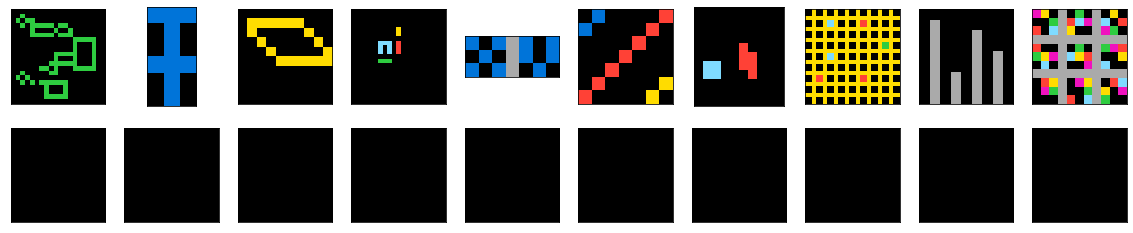

In [35]:
decoded_imgs = autoencoder.predict(X_test_big)

n = 10
plt.figure(figsize=(20, 4))


cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    orig_shape = np.asarray(Xs_test[i]).shape[1:]
    plt.imshow(X_test_big[i][:orig_shape[0],:orig_shape[1]]*10, cmap=cmap, norm=norm)#.reshape(orig_shape[0],orig_shape[1]) ## Xs_test
#    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
# encoder = keras.Model(input_img, encoded)
# encoded_imgs = encoder.predict(X_test_big)

# n = 10
# plt.figure(figsize=(20, 8))
# for i in range(1, n + 1):
#     ax = plt.subplot(1, n, i)
#     plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [58]:
x = X_train_big[125:126]
# print(x.shape)
# encoded_imgs = autoencoder.encoder(x.reshape((1,32,32) +(1,)))
# decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

pred_x = autoencoder.predict(x.reshape(1,32,32,1))
pred_x = pred_x.reshape(32,32)
# pred_x = np.around(pred_x,1)

     

x = (x.reshape(32,32))*10

y = y_train_big[125]



test = X_test_big[40]
# pred_t = autoencoder.predict(test.reshape(1,1,32,32,1))

test = (test.reshape(32,32))*10


# pred_t = (pred_t.reshape(32,32))
# pred_t = np.around(pred_t,1)*10

In [60]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
pred_x

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

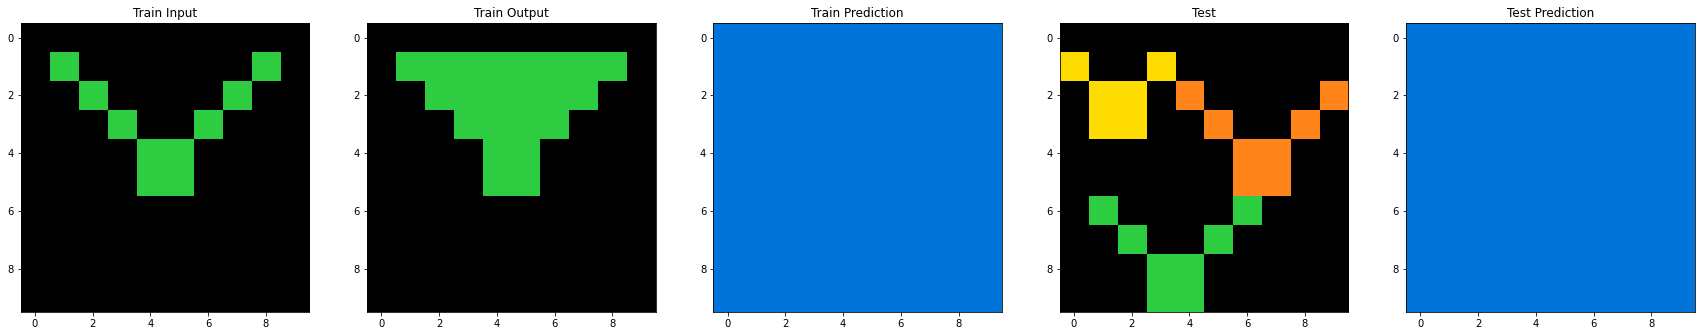

In [56]:
cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
fig, ax = plt.subplots(1, 5, figsize=(30,30))
ax[0].imshow(x[:10,:10], cmap=cmap, norm=norm)
ax[0].set_title('Train Input')
ax[1].imshow(y[:10,:10], cmap=cmap, norm=norm)
ax[1].set_title('Train Output')
ax[2].imshow(pred_x[:10,:10], cmap=cmap, norm=norm)
ax[2].set_title('Train Prediction')
ax[3].imshow(test[:10,:10], cmap=cmap, norm=norm)
ax[3].set_title('Test')
ax[4].imshow(pred_t[:10,:10], cmap=cmap, norm=norm)
ax[4].set_title('Test Prediction');